# Iris Deployment

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

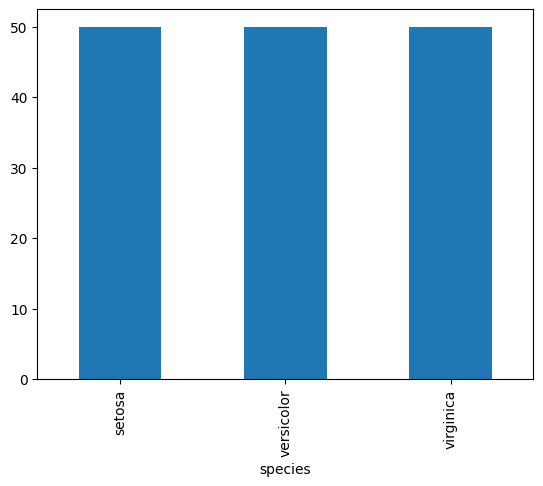

In [6]:
df['species'].value_counts().plot(kind='bar')

### Seperate X and Y

In [7]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply preprocessing on X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Save above pipeline to pickle format

In [13]:
import pickle

In [14]:
with open('pipe.pkl', 'wb') as file1:
    pickle.dump(num_pipe, file1)

### Train test split
33% - Test (Unseen to the model)

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33,
                                                random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [17]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Create a LogisticRegression Model

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

### Evaluate the model in train and test

In [21]:
model.score(xtrain, ytrain)

0.96

In [22]:
model.score(xtest, ytest)

0.98

### Save above model as pickle

In [23]:
with open('model.pkl', 'wb') as file2:
    pickle.dump(model, file2)

### Check predictions for train and test

In [24]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [25]:
ypred_tr[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [26]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [27]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [28]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Plot the confusion matrix

In [29]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

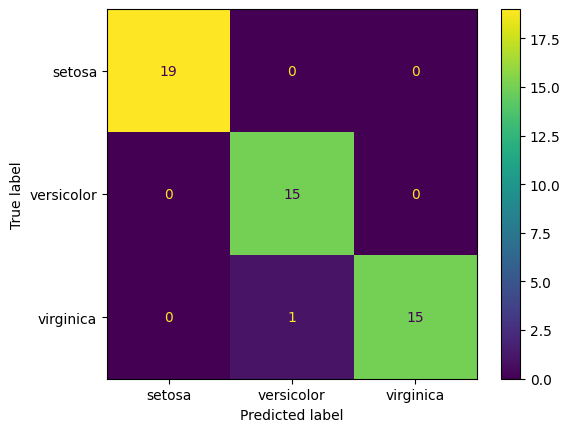

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Check the classifaction report 

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Above model has good f1 score above 0.8 hence it is a very good model

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [36]:
scores.mean()

0.9319552669552669